# Requirements

In [204]:
!pip install tensorflow keras

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [210]:
data = pd.read_csv('BTC-daily.csv')
data.head(5)

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


Explore the dataset using visualizations of your choice.

In [212]:
def vizuelizacija(data,columns,numerical):
    plt.figure(figsize=(14,4))
    for i in range(len(columns)):
        plt.subplot(1,len(columns),i+1)
        if numerical:
            plt.hist(data[columns[i]],bins=15)
        else:
            counts = data.groupby(columns[i])
            plt.bar(counts.index.astype(str),counts)
    plt.title(columns[i])

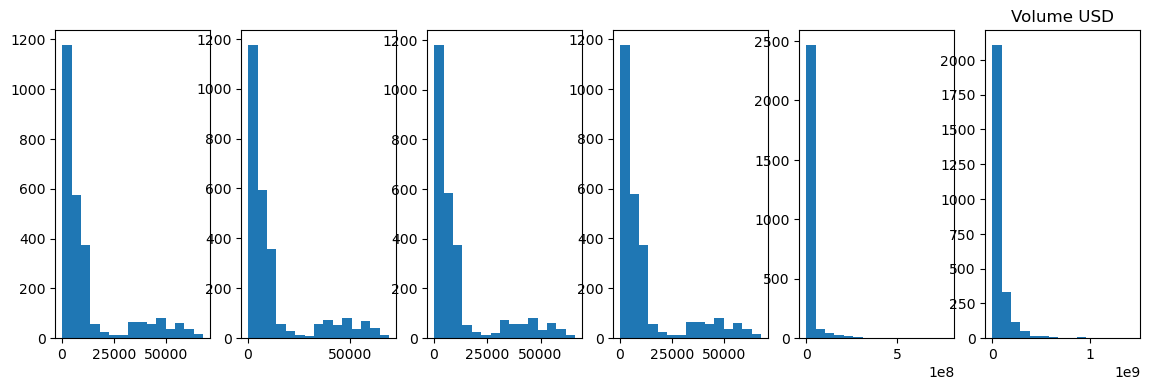

In [213]:
vizuelizacija(data,['open','high','low','close','Volume BTC','Volume USD'],True)

In [214]:
#nitu edna od kolonite nema normalna raspredelba

In [215]:
data.isnull().sum()

date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [216]:
data=data.sort_values('date')
data.head(5)

,date,symbol,open,high,low,close,Volume BTC,Volume USD
2616,1/1/2015 0:00,BTC/USD,319.25,321.00,312.60,316.31,1.018388e+06,3.223060e+03
2251,1/1/2016 0:00,BTC/USD,430.89,436.00,427.20,434.98,1.617803e+06,3.735620e+03
1885,1/1/2017 0:00,BTC/USD,966.34,1005.00,960.53,998.80,6.579904e+06,6.665420e+03
1520,1/1/2018 0:00,BTC/USD,13880.00,13941.75,12801.38,13443.41,1.028157e+08,7.688030e+03
1155,1/1/2019 0:00,BTC/USD,3693.85,3845.46,3629.66,3823.44,5.149606e+03,1.968921e+07


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2651 entries, 2616 to 173
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2651 non-null   object 
 1   symbol      2651 non-null   object 
 2   open        2651 non-null   float64
 3   high        2651 non-null   float64
 4   low         2651 non-null   float64
 5   close       2651 non-null   float64
 6   Volume BTC  2651 non-null   float64
 7   Volume USD  2651 non-null   float64
dtypes: float64(6), object(2)
memory usage: 186.4+ KB


In [218]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2651 entries, 2616 to 173
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   symbol      2651 non-null   object        
 2   open        2651 non-null   float64       
 3   high        2651 non-null   float64       
 4   low         2651 non-null   float64       
 5   close       2651 non-null   float64       
 6   Volume BTC  2651 non-null   float64       
 7   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 186.4+ KB


In [219]:
def fill_dates(data):
    data_copy = data.copy()
    data_copy.set_index('date',inplace=True)
    full_dates = pd.date_range(start=data_copy.index.min(),end=data_copy.index.max(),freq='D')
    data_copy = data_copy.reindex(full_dates)
    return data_copy

In [220]:
data = fill_dates(data)
data.head(10)

,symbol,open,high,low,close,Volume BTC,Volume USD
2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53
2014-12-03,BTC/USD,379.25,383.00,374.23,376.67,2998357.92,7908.29
2014-12-04,BTC/USD,376.67,378.99,360.01,365.20,3297896.46,8865.09
2014-12-05,BTC/USD,365.20,377.89,363.99,374.95,3331762.49,8951.16
2014-12-06,BTC/USD,374.95,376.99,371.31,375.07,861748.71,2300.21
2014-12-07,BTC/USD,375.07,377.50,373.16,376.87,913715.62,2429.62


In [221]:
#so funkcijata fill_dates dopolnuvame nekoj datum vo slucaj da fali

In [222]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['symbol'])
data['symbol'] = encoded_values

In [223]:
#bidejki target kolonata ni e close, site ostanati se dropnuvaat
def columns_to_drop(data,columns):
    for i in range(len(columns)):
        data.drop(columns[i],axis=1,inplace=True)

In [224]:
columns_to_drop(data,['symbol','open','high','low','Volume BTC','Volume USD'])
data.head(5)

,close
2014-11-28,376.28
2014-11-29,376.72
2014-11-30,373.34
2014-12-01,378.39
2014-12-02,379.25


In [225]:
data = data.reset_index()
data.head(5)

,index,close
0,2014-11-28,376.28
1,2014-11-29,376.72
2,2014-11-30,373.34
3,2014-12-01,378.39
4,2014-12-02,379.25


In [226]:
data.drop('index',axis=1,inplace=True)

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [228]:
columns_for_lags = data.columns
for feature in columns_for_lags:
    for lag in range(1,8):
        data[f'{feature}_lag_{lag}']=data[feature].shift()

In [229]:
data=data.dropna()
data.head(5)

,close,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
1,376.72,376.28,376.28,376.28,376.28,376.28,376.28,376.28
2,373.34,376.72,376.72,376.72,376.72,376.72,376.72,376.72
3,378.39,373.34,373.34,373.34,373.34,373.34,373.34,373.34
4,379.25,378.39,378.39,378.39,378.39,378.39,378.39,378.39
5,376.67,379.25,379.25,379.25,379.25,379.25,379.25,379.25


In [230]:
data.isnull().sum()

close          0
close_lag_1    0
close_lag_2    0
close_lag_3    0
close_lag_4    0
close_lag_5    0
close_lag_6    0
close_lag_7    0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [232]:
from sklearn.model_selection import train_test_split
data_new = data.drop('close',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['close'],test_size=0.2,shuffle=False)

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [235]:
#prven gi skalirame podatocite


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [236]:
X_train.shape[0] #broj na zapisi

2120

In [237]:
lag

7

In [238]:
X_train.shape[1]

7

In [239]:
X_train = X_train.reshape(X_train.shape[0], lag, (X_train.shape[1] // lag))
X_test = X_test.reshape(X_test.shape[0], lag, (X_test.shape[1] // lag))

In [240]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [241]:
model = Sequential([
    Input((X_train.shape[1], X_train.shape[2],)),
    LSTM(8, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [242]:
#kako loss function moze da se koristi MSE , bidejki target promenlivata ni e numericka
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [243]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=4, batch_size=8, shuffle=False)

Epoch 1/4
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3603397.0000 - mean_squared_error: 3603397.0000 - val_loss: 8658557.0000 - val_mean_squared_error: 8658557.0000
Epoch 2/4
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7731090.0000 - mean_squared_error: 7731090.0000 - val_loss: 5322109.5000 - val_mean_squared_error: 5322109.5000
Epoch 3/4
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6308719.5000 - mean_squared_error: 6308719.5000 - val_loss: 2825694.5000 - val_mean_squared_error: 2825694.5000
Epoch 4/4
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4786430.5000 - mean_squared_error: 4786430.5000 - val_loss: 1160526.8750 - val_mean_squared_error: 1160526.8750


Use the trained model to make predictions for the test set.

<Axes: >

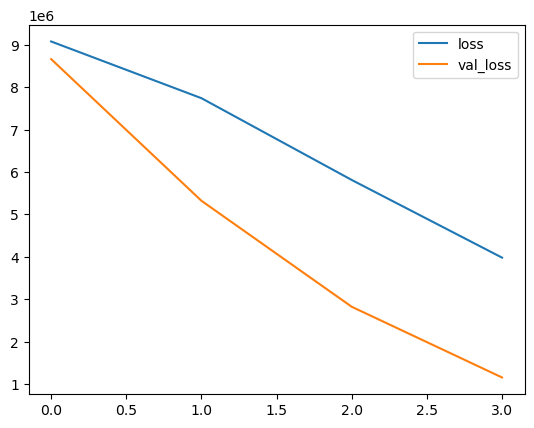

In [245]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [246]:
preds = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [248]:
from sklearn.metrics import r2_score
print("R2-score : ",r2_score(preds,Y_test))

R2-score :  0.6863947225229834


# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.

In [252]:
data2=pd.read_csv('BTC-daily.csv')
data2.head(5)

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [253]:
data2=data2.sort_values('date')

In [254]:
data2['date']=pd.to_datetime(data2['date'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2651 entries, 2616 to 173
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   symbol      2651 non-null   object        
 2   open        2651 non-null   float64       
 3   high        2651 non-null   float64       
 4   low         2651 non-null   float64       
 5   close       2651 non-null   float64       
 6   Volume BTC  2651 non-null   float64       
 7   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 186.4+ KB


In [255]:
data2=fill_dates(data2)
data2.head(5)

,symbol,open,high,low,close,Volume BTC,Volume USD
2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [256]:
data2.reset_index(inplace=True)

In [257]:
data2.rename(columns={'index': 'date'}, inplace=True)

In [258]:
data2.head(5)

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
1,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
3,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
4,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [259]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   symbol      2651 non-null   object        
 2   open        2651 non-null   float64       
 3   high        2651 non-null   float64       
 4   low         2651 non-null   float64       
 5   close       2651 non-null   float64       
 6   Volume BTC  2651 non-null   float64       
 7   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 165.8+ KB


In [260]:
columns_to_drop(data2,['symbol','open','high','low','Volume BTC','Volume USD'])
data2.head(5)

,date,close
0,2014-11-28,376.28
1,2014-11-29,376.72
2,2014-11-30,373.34
3,2014-12-01,378.39
4,2014-12-02,379.25


In [261]:
data2.set_index('date', inplace=True)

data2=data2.resample('M').mean()
data2.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_17320\912018723.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data2=data2.resample('M').mean()


,close
date,
2014-11-30,375.446667
2014-12-31,341.813548
2015-01-31,247.703871
2015-02-28,234.278214
2015-03-31,268.596774


In [262]:
#creating the lags
columns_for_lags = data2.columns
for feature in columns_for_lags:
    for lag in range(1,8):
        data2[f'{feature}_lag_{lag}']=data2[feature].shift()

In [263]:
data2=data2.dropna()

In [264]:
data2.isnull().sum()

close          0
close_lag_1    0
close_lag_2    0
close_lag_3    0
close_lag_4    0
close_lag_5    0
close_lag_6    0
close_lag_7    0
dtype: int64

In [265]:
from sklearn.model_selection import train_test_split
data_new = data2.drop('close',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data2['close'],test_size=0.2,shuffle=False)

In [266]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [267]:
X_train = X_train.reshape(X_train.shape[0], lag, (X_train.shape[1] // lag))
X_test = X_test.reshape(X_test.shape[0], lag, (X_test.shape[1] // lag))

In [268]:
model = Sequential([
    Input((X_train.shape[1], X_train.shape[2],)),
    LSTM(8, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [269]:
#kako loss function moze da se koristi MSE , bidejki target promenlivata ni e numericka
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [270]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=4, batch_size=8, shuffle=False)

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 11622622.0000 - mean_squared_error: 11622622.0000 - val_loss: 84289832.0000 - val_mean_squared_error: 84289832.0000
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11622564.0000 - mean_squared_error: 11622564.0000 - val_loss: 84289512.0000 - val_mean_squared_error: 84289512.0000
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11622493.0000 - mean_squared_error: 11622493.0000 - val_loss: 84289096.0000 - val_mean_squared_error: 84289096.0000
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11622412.0000 - mean_squared_error: 11622412.0000 - val_loss: 84288624.0000 - val_mean_squared_error: 84288624.0000


In [271]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


In [272]:
print("R2-score : ",r2_score(pred,Y_test))

R2-score :  -418539700454.7443
